In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/roads-segmentation-dataset/roads_segmentation.csv
/kaggle/input/roads-segmentation-dataset/annotations.xml
/kaggle/input/roads-segmentation-dataset/images/11.png
/kaggle/input/roads-segmentation-dataset/images/4.png
/kaggle/input/roads-segmentation-dataset/images/9.png
/kaggle/input/roads-segmentation-dataset/images/14.png
/kaggle/input/roads-segmentation-dataset/images/1.png
/kaggle/input/roads-segmentation-dataset/images/20.png
/kaggle/input/roads-segmentation-dataset/images/2.png
/kaggle/input/roads-segmentation-dataset/images/10.png
/kaggle/input/roads-segmentation-dataset/images/18.png
/kaggle/input/roads-segmentation-dataset/images/21.png
/kaggle/input/roads-segmentation-dataset/images/12.png
/kaggle/input/roads-segmentation-dataset/images/28.png
/kaggle/input/roads-segmentation-dataset/images/22.png
/kaggle/input/roads-segmentation-dataset/images/7.png
/kaggle/input/roads-segmentation-dataset/images/29.png
/kaggle/input/roads-segmentation-dataset/images/17.png
/kag

In [2]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 54.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 58.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.7 MB/s eta 0:00:00:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=3c2c37e8531e726b3a3aed54bf9597ff2c81561aa1fdec1dfaa0c82dd0b0b863
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing
  Attempting uninstal

In [3]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# **0. Создаем 2 списка: путей каритнок и путей аннотаций**

In [ ]:
# /kaggle/input/roads-segmentation-dataset/images/11.png
# /kaggle/input/roads-segmentation-dataset/masks/11.png

In [14]:
# mask_files = glob.glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
im = Glob('/kaggle/input/roads-segmentation-dataset/images/*')
ma = Glob('/kaggle/input/roads-segmentation-dataset/masks/*')

image = [str(i) for i in im]#.sort()
mask = [str(i) for i in ma]#.sort()

image.sort()
mask.sort()

image = image[1:] # удаляем первое значение с названием 0.jpg
mask = mask[1:] # удаляем первое значение с названием 0.jpg

print(image[:1])
print(mask[:1])
print(len(image))
print(len(mask))

['/kaggle/input/roads-segmentation-dataset/images/1.png']
['/kaggle/input/roads-segmentation-dataset/masks/1.png']
30
30


# **1. Смотрим картинки**

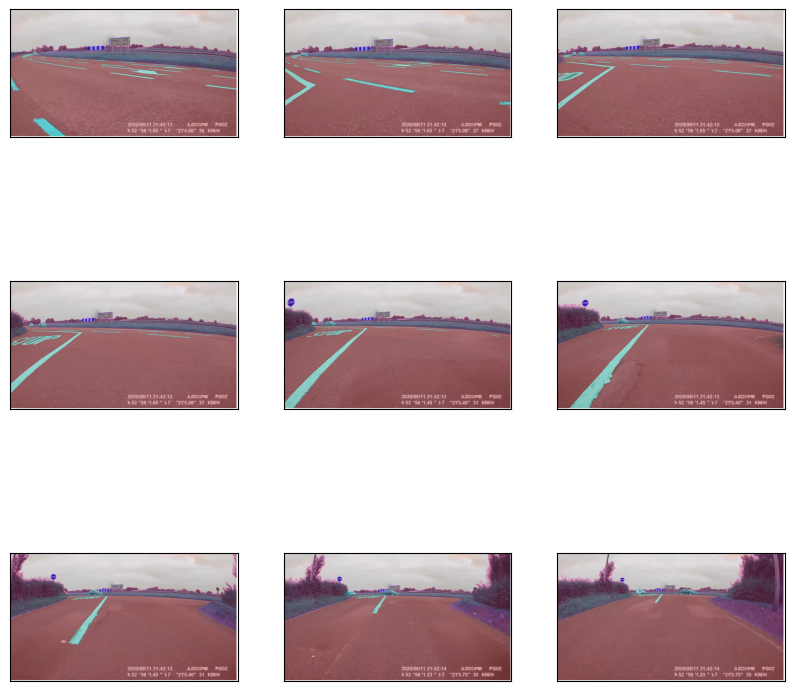

In [17]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=image[i]
    msk_path=mask[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.3)
    plt.xticks([]), plt.yticks([])
plt.show()

# **3. Смотрим аннотации (изображения)**

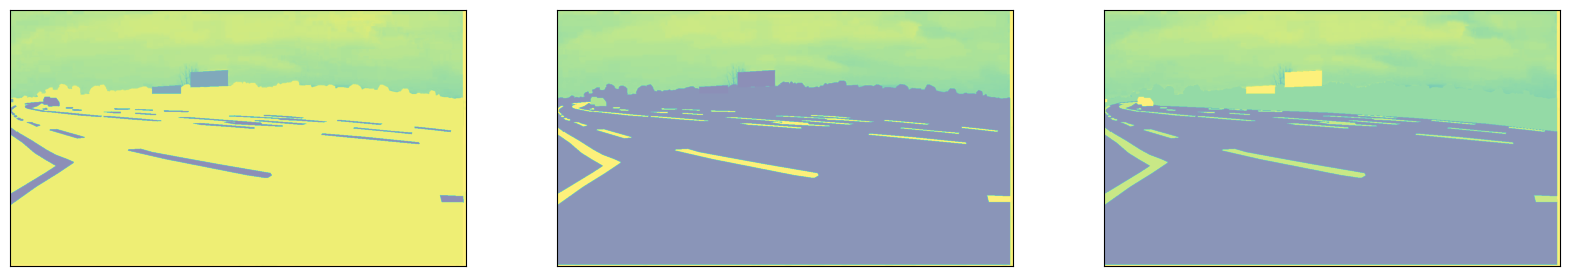

In [21]:
rows,cols=1,3
fig=plt.figure(figsize=(20,20))
for i in np.arange(1,4):
    fig.add_subplot(rows,cols,i)
    msk_path=mask[2]
    msk=cv2.imread(msk_path)
    plt.imshow(msk.transpose(-1,0,1)[i-1],alpha=0.6)
    plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
# читаем картинку маски, 4меняем каналы местасми на (3,250,250),
an = cv2.imread(mask[2], 1).transpose(2,0,1)#/255
r,g,b = an

lst = []
for _ in [0,1,2]:
    k = r,g,b
    h = 'rgb'
    for i in k[_]:
        for j in i:
            if j not in lst: lst.append(j)
    print(f'Значения в канале {h[_]}: {lst}')

Значения в канале r: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 5, 7, 12, 14, 15, 17, 16, 19, 21, 20, 13, 169, 255, 253, 29, 27, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 43, 44, 38, 35, 42, 45, 47, 48, 49, 50, 52, 53, 51, 46, 175, 174, 176, 178, 179, 180, 181, 182, 183, 186, 187, 188, 189, 190, 185, 184, 192, 194, 193, 196, 195, 197, 199, 200, 198, 191, 173, 238, 208, 207, 209, 210, 211, 213, 214, 215, 216, 218, 220, 221, 222, 223, 217, 219, 224, 226, 227, 229, 228, 231, 232, 230, 225, 212, 205, 203, 236, 202, 204, 206, 235, 240, 242, 243, 201, 234, 233, 237, 245, 241, 246, 248, 177, 172, 167, 168, 165, 160, 156, 170, 164, 94, 148, 171, 166, 163, 146, 161, 155, 154, 145, 159, 158, 141, 150, 162, 136, 152, 149, 147, 135, 138, 140, 142, 126, 131, 144, 134, 137, 125, 153, 139, 133, 119, 121, 132, 128, 118, 111, 130, 109, 107, 112, 151, 157, 143, 252, 247, 251, 239, 250, 244, 249, 254]
Значения в канале g: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 5, 7, 12, 14, 15, 17, 16, 19, 21, 20, 13, 169, 255, 253, 29, 2

In [29]:
# msk=cv2.imread(mask[0])
# msk=cv2.cvtColor(img,cv2.COLOR_BGR2grey)
# msk

AttributeError: module 'cv2' has no attribute 'COLOR_BGR2grey'

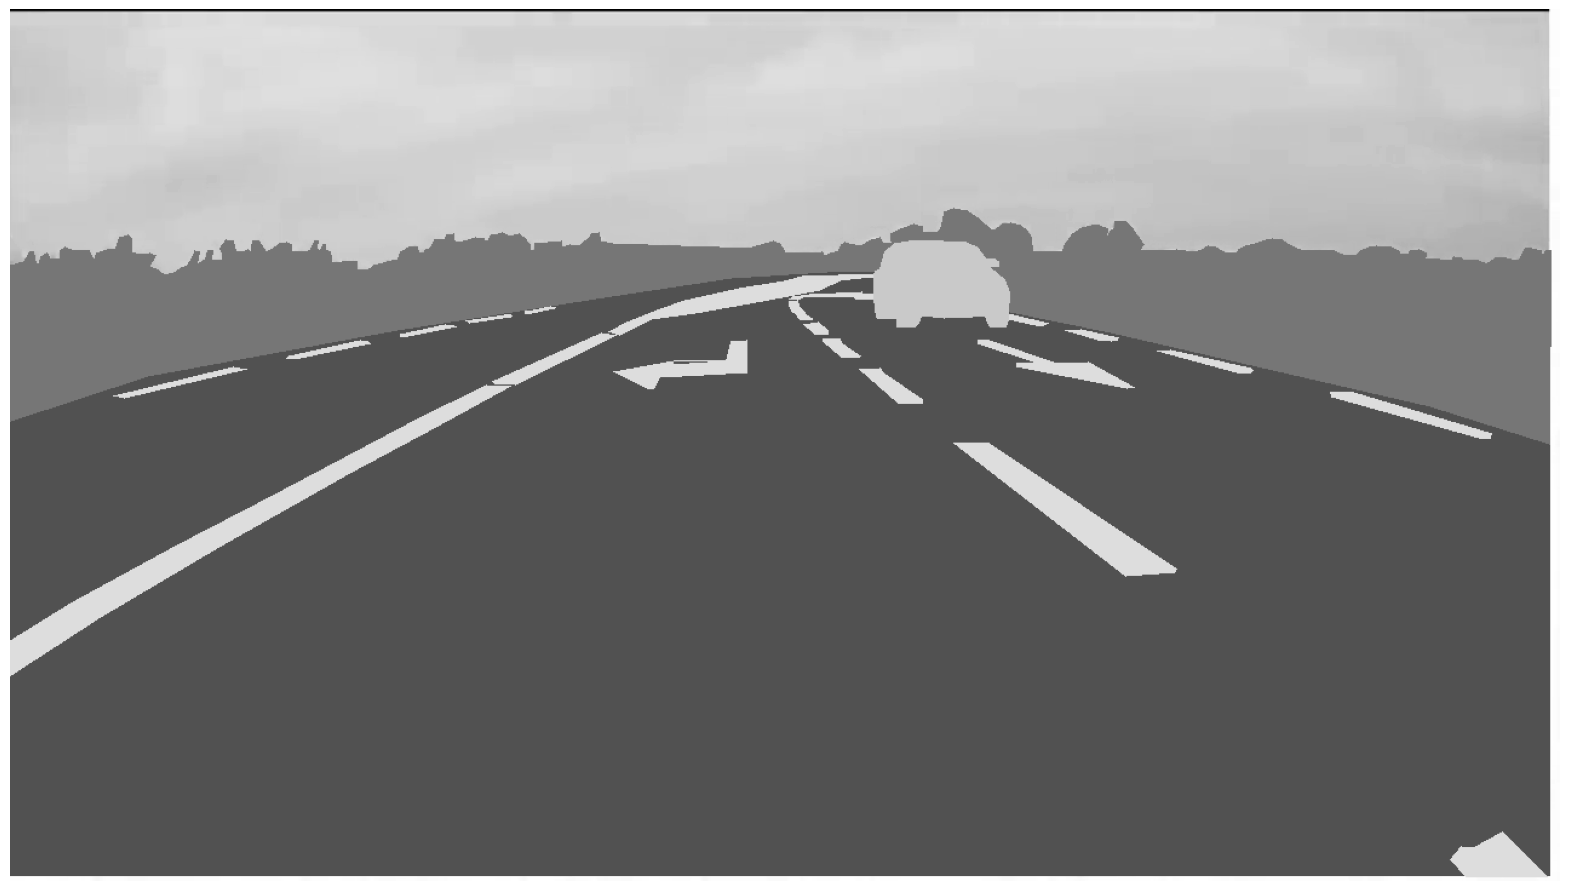

array([[  0,   0,   0, ..., 253, 253, 253],
       [ 26,  26,  26, ..., 253, 253, 253],
       [183, 183, 183, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 252, 252, 252],
       [254, 254, 254, ..., 252, 252, 252],
       [254, 254, 254, ..., 252, 252, 252]], dtype=uint8)

In [36]:
img = read(mask[0],0)
# img = cv2.cvtColor(mask[0],cv2.COLOR_BGR2GRAY)

show(img)
img

In [48]:
lst = []

for i in img:
    
    print(i)
    print(set(i))
    for j in i:
#             print(j)
        if j not in lst: lst.append(j)
        
    break
print(f'Значения в маске, типа число классов: \n{sorted(lst)}')

[  0   0   0 ... 253 253 253]
{0, 1, 2, 3, 184, 253}
Значения в маске, типа число классов: 
[0, 1, 2, 3, 184, 253]


In [ ]:
# этот блок для просмотра классов в батче
lst = []
for _ in trn_dl:
    for i in np.array(_[1][0].cpu()):
#         print(i.shape)
        for j in i:
#             print(j)
            if j not in lst: lst.append(j)
    break
print(f'Значения в маске, типа число классов: \n{sorted(lst)}')